In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Flatten, Dense, Input, ReLU

2021-11-02 14:00:44.019375: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
path_to_dataset = '../dataset/'
PATH = os.path.join(os.path.dirname(path_to_dataset))
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (32, 32)

In [4]:
# Train dataset 
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 782 files belonging to 2 classes.


In [5]:
# Validation dataset
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)


Found 220 files belonging to 2 classes.


In [6]:
# Model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                49168     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 49,322
Trainable params: 49,322
Non-trainable params: 0
_________________________________________________________________


In [8]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

2021-11-02 14:01:25.669281: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-02 14:01:25.686399: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2799925000 Hz


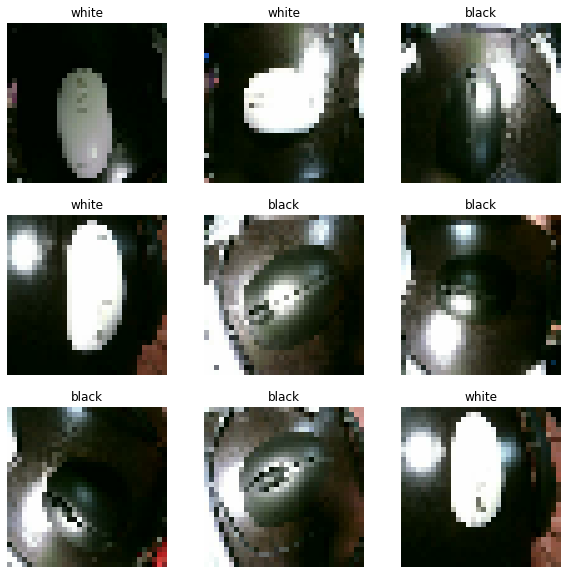

In [9]:
# Visualize the dataset 
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [10]:
# Hyperparameter 
base_learning_rate = 0.0001
initial_epochs = 10

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
# Evaluate model before training 
loss0, accuracy0 = model.evaluate(validation_dataset)

6/6 [==============================] - 1s 3ms/step - loss: 0.8239 - accuracy: 0.4787


In [12]:
# Train model 
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6113 - accuracy: 0.6803 - val_loss: 0.6081 - val_accuracy: 0.6489
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.7494 - val_loss: 0.6041 - val_accuracy: 0.6543
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4452 - accuracy: 0.8389 - val_loss: 0.4663 - val_accuracy: 0.9043
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3687 - accuracy: 0.9361 - val_loss: 0.3949 - val_accuracy: 0.9149
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3475 - accuracy: 0.9719 - val_loss: 0.3747 - val_accuracy: 0.9255
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3408 - accuracy: 0.9719 - val_loss: 0.3905 - val_accuracy: 0.9202
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3394 - accuracy: 0.9629 - val_loss: 0.3725 - val_accuracy: 0.9309
Epoch 8/10
25/25 [==

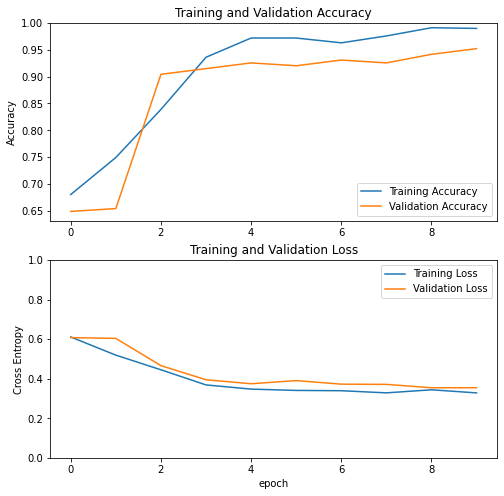

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [14]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3222 - accuracy: 0.9885 - val_loss: 0.3811 - val_accuracy: 0.9255
Epoch 11/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3259 - accuracy: 0.9923 - val_loss: 0.3580 - val_accuracy: 0.9574
Epoch 12/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3291 - accuracy: 0.9898 - val_loss: 0.3693 - val_accuracy: 0.9362
Epoch 13/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3227 - accuracy: 1.0000 - val_loss: 0.3628 - val_accuracy: 0.9468
Epoch 14/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3187 - accuracy: 0.9923 - val_loss: 0.3491 - val_accuracy: 0.9521
Epoch 15/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3263 - accuracy: 0.9898 - val_loss: 0.3467 - val_accuracy: 0.9521
Epoch 16/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3296 - accuracy: 0.9770 - val_loss: 0.3824 - val_accuracy: 0.9309
Epoch 17/20
2

In [15]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

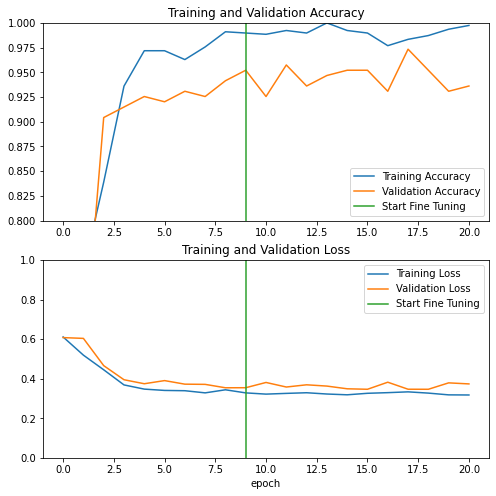

In [16]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [17]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/1 [==============================] - 0s 50ms/step - loss: 0.3445 - accuracy: 0.9688
Test accuracy : 0.96875


Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0]


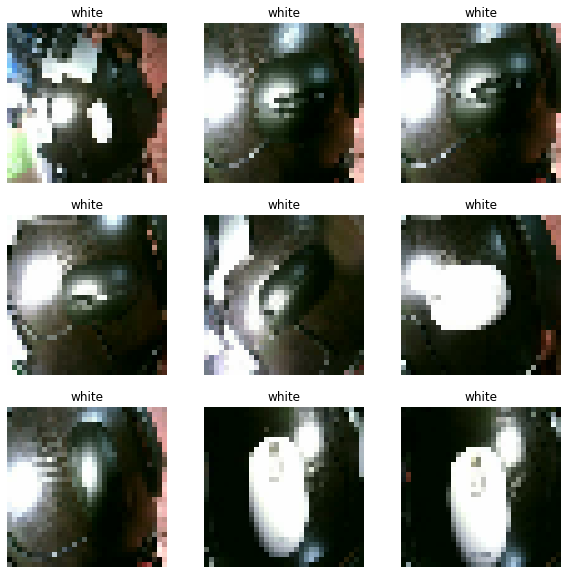

In [18]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

In [30]:
def representative_dataset():
    for _ in range(100):
        data = np.random.rand(1, 32, 32, 3)
        yield [data.astype(np.float32)]

In [56]:
# Save model 
model.save('mouse_model.h5')

In [41]:
ls

mouse_model.h5  mouse_quantized.tflite  train_notebook.ipynb*


In [53]:
# # Model Compression 
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.representative_dataset = representative_dataset
# # Ensure that if any ops can't be quantized, the converter throws an error
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# # Set the input and output tensors to uint8 (APIs added in r2.3)
# converter.inference_input_type = tf.uint8
# converter.inference_output_type = tf.uint8
# tflite_quant_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpzoychb98/assets


INFO:tensorflow:Assets written to: /tmp/tmpzoychb98/assets
2021-11-02 14:22:05.862665: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-11-02 14:22:05.862818: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-11-02 14:22:05.863995: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1144] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.007ms.
  function_optimizer: function_optimizer did nothing. time = 0.001ms.

2021-11-02 14:22:05.890776: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:345] Ignored output_format.
2021-11-02 14:22:05.890805: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:348] Ignored drop_control_dependency.
fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3


In [57]:
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('mouse_model.h5')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

2021-11-02 14:22:54.714603: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-11-02 14:22:54.714711: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-11-02 14:22:54.715754: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1144] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.005ms.
  function_optimizer: function_optimizer did nothing. time = 0.001ms.



INFO:tensorflow:Assets written to: /tmp/tmp5ep1h71e/assets


INFO:tensorflow:Assets written to: /tmp/tmp5ep1h71e/assets


INFO:tensorflow:Restoring parameters from /tmp/tmp5ep1h71e/variables/variables


INFO:tensorflow:Restoring parameters from /tmp/tmp5ep1h71e/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: flatten_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: flatten_input


INFO:tensorflow: tensor name: serving_default_flatten_input:0, shape: (-1, 32, 32, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_flatten_input:0, shape: (-1, 32, 32, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_2


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_2


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 2), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 2), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from /tmp/tmp5ep1h71e/variables/variables


INFO:tensorflow:Restoring parameters from /tmp/tmp5ep1h71e/variables/variables
2021-11-02 14:22:55.420754: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-11-02 14:22:55.420872: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-11-02 14:22:55.435261: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1144] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 235 nodes (174), 440 edges (349), time = 5.587ms.
  function_optimizer: function_optimizer did nothing. time = 0.114ms.

2021-11-02 14:22:55.468576: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:345] Ignored output_format.
2021-11-02 14:22:55.468602: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:348] Ignored drop_control_dependency.
fully_quantize: 0, inference_type: 6, input_inference_type: 0, output_inference_type: 0


In [60]:
open("mouse_quantized.tflite", "wb").write(tflite_quant_model)

51920

In [54]:
# rm -rf mouse_quantized.tflite

In [46]:
# rm -rf mouse_model.h5

In [59]:
ls

mouse_model.h5  train_notebook.ipynb*


In [ ]:
# from pathlib import Path
# import imghdr

# data_dir = "/home/george/Documents/git/image_classification_with_openmv_camera/dataset/train/white"
# image_extensions = [".png", ".jpg"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(data_dir).rglob("*"):
#     #print(filepath)
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")